In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np
#import matplotlib as mpl
import cv2  # conda install -c conda-forge opencv
from moviepy.editor import VideoFileClip
from moviepy.editor import *


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['axes.grid'] = False
#plt.style.use('dark_background')
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 15
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams['figure.facecolor'] = 'white'

### video options (transfered from harddrive):
- 2024_0225_175520_003.MP4
- 2024_0227_155147_016.MP4
### just re-check all ...


In [2]:
vid_path = "./data/videos/birdbath/"
vid_filename = "2024_0229_115124_054.MP4"  # d_high
vid_filepath = f"{vid_path}{vid_filename}"
PROCESS_VIDEO = False
SAVE_VIDEO = False
SHOW_VIDEO = False
print(vid_filepath)

#1min28-38 - turn + bump > toes
#1:58-2:02  one leech step
#21-31 left-right-turn
#3:45-51 - whirling-stepping-whirling-swimming, toes visibale
#5:24-32 - extend corona, fly in circle-best focus
#5:33-40 antenae visible from left to right, then sharp turn + foot as ruder
#5:40/41-43/44 - foot retracts after sharp turn
#6:22/23-28 - corona transition, then swimming, decent focus
trim_start = 324 
trim_end = 332
trim_duration = trim_end - trim_start

if PROCESS_VIDEO:
    video_clip = VideoFileClip(vid_filepath).subclip(trim_start, trim_end)
    duration = video_clip.duration
    resolution = video_clip.size
    fps = video_clip.fps

    print(duration, fps, resolution)
    if SAVE_VIDEO:
        video_clip.write_videofile(f"{vid_path}{vid_filename.split('.')[0]}_subclip_{trim_duration}sec_ts{trim_start}-te{trim_end}.mp4",
                                    fps=fps, codec="libx264", audio=False)
    video_clip.close()

./data/videos/birdbath/2024_0229_115124_054.MP4


In [3]:
if SHOW_VIDEO:
    vid_filepath_trim = f"{vid_path}{vid_filename.split('.')[0]}_{trim_duration}sec.mp4"
    video_clip = VideoFileClip(vid_filepath_trim)
    video_clip.ipython_display(t=5) # no interactive mode
    #video_clip.show(5, interactive=True)  # use this for interactive, easy cropping area

2160 2880


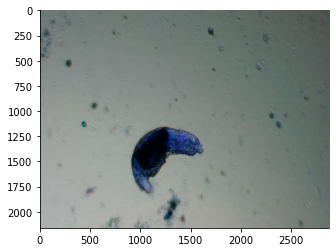

In [4]:
SHOW_FRAME = True
if SHOW_FRAME:
    vid_filepath_trim = f"{vid_path}{vid_filename.split('.')[0]}_subclip_{trim_duration}sec_ts{trim_start}-te{trim_end}.mp4"
    cap = cv2.VideoCapture(vid_filepath_trim)
    ret, frame = cap.read()
    height, width, _ = frame.shape
    print(height, width)

    plt.figure()
    plt.imshow(frame)
    #plt.imshow(frame[100:900, 1100:1500])

In [6]:
fps = 24

# no cropping but reduce the size of the video to something smaller 
- export with quicktime thus far 640x480

In [8]:
SAVE_VIDEO = True
if SAVE_VIDEO:
    # trim video path > load in 
    video_clip = VideoFileClip("./data/videos/birdbath/2024_0229_115124_054_subclip_8sec_ts324-te332.mp4")
    # video_crop = video_clip.fx(vfx.crop, x1=1250, x2=2100, y1=250, y2=2100) # for 55
    # video_crop = video_clip.fx(vfx.crop, x1=0, x2=700, y1=0, y2=height) fpr 54
    #video_crop = video_clip.fx(vfx.crop, x1=1100, x2=1500, y1=100, y2=900) # fpr 64
    video_crop = video_clip.fx(vfx.crop, x1=200, x2=2879, y1=200, y2=2159) #
    #video_crop = video_crop.rotate(90)
    #video_crop = vfx.mirror_x(video_crop) # .fx(vfx.rotate(90))
    video_crop.write_videofile(f"{vid_path}{vid_filename.split('.')[0]}_subclip_{trim_duration}sec_ts{trim_start}-te{trim_end}_cropped.mp4", fps=int(fps), codec="libx264", audio=False)
    video_crop.close()
    video_clip.close()

Moviepy - Building video ./data/videos/birdbath/2024_0229_115124_054_subclip_8sec_ts324-te332_cropped.mp4.
Moviepy - Writing video ./data/videos/birdbath/2024_0229_115124_054_subclip_8sec_ts324-te332_cropped.mp4



Moviepy - Done !
Moviepy - video ready ./data/videos/birdbath/2024_0229_115124_054_subclip_8sec_ts324-te332_cropped.mp4


# Analysis

In [ ]:
vid_path = "./data/videos/individual-rotifer/"
vid_filename = f"2024_0216_161747_055_{trim_duration}sec_cropped"
vid_extension = ".mp4"

vid_filepath = f"{vid_path}{vid_filename}{vid_extension}"
seg_mask_path = f"./data/results/{vid_filename}_masks"

vid_clip = VideoFileClip(vid_filepath)
fps = int(vid_clip.fps)  # get from file original, not segmented
resolution = vid_clip.size
vid_clip.close()

print(fps, resolution)

## Frame extraction

In [ ]:
EXTRACT_FRAMES = False
frames_filepaths = f"./data/images/{vid_filename}/"
zfill_ = 5  # correspond to seg-masks

if EXTRACT_FRAMES:
    os.makedirs(frames_filepaths, exist_ok=True)
    video = cv2.VideoCapture(vid_filepath)
    frame_counter = 0
    while True:
        ret, frame = video.read()
        if not ret:
            break
        if frame_counter % 1 == 0:
            cv2.imwrite(f"{frames_filepaths}/frame_{str(frame_counter).zfill(zfill_)}.jpg", frame)  
        frame_counter += 1
    video.release()